In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Written script for useful functions
import imtools

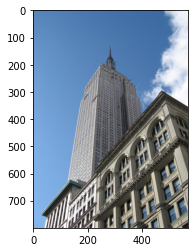

In [3]:
# Read and show an image
im = np.array(Image.open('../../images/empire.jpg'))
plt.imshow(im)
plt.show()

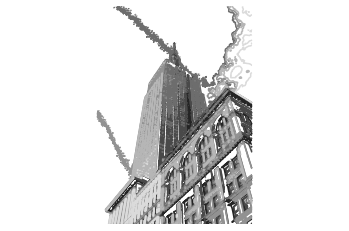

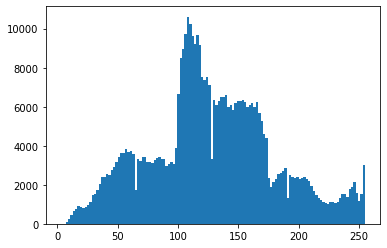

In [4]:
# Image iso-contour
# Need grayscale
im_gray = np.array(Image.open('../../images/empire.jpg').convert('L'))

plt.figure()
plt.gray()

plt.contour(im_gray,origin='image')
plt.axis('equal')
plt.axis('off')

# Histogram of colour intensity
plt.figure()
plt.hist(im_gray.flatten(),128)

plt.show()

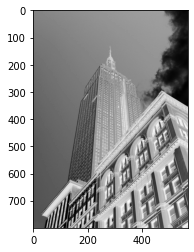

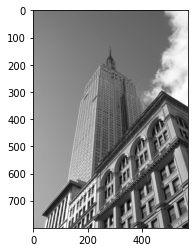

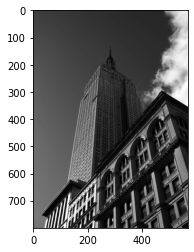

In [5]:
# Graylevel transforms

# Inversion
plt.figure()
plt.gray()
plt.imshow(255 - im_gray)

# Clamping to [100,200]
plt.figure()
plt.gray()
plt.imshow((100/255)*im_gray+100)

# Quadratic map lowering the values of darker pixels
plt.figure()
plt.gray()
plt.imshow(255*(im_gray/255)**2)

plt.show()

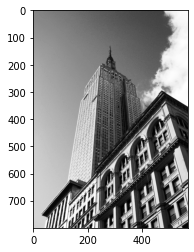

In [6]:
# Histogram equalization
im_equalize, cdf = imtools.histeq(im_gray)
plt.imshow(im_equalize)

In [7]:
# Scipy filter module
from scipy.ndimage import filters

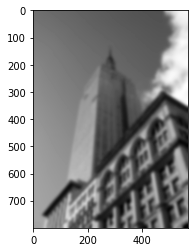

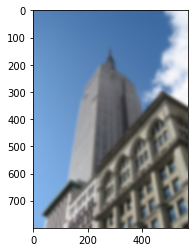

In [8]:
# Gaussian filters by scipy

# Grayscale
plt.figure()
plt.imshow(filters.gaussian_filter(im_gray,5))

# Colored
im2 = np.zeros(im.shape)
for i in range(3):
    im2[:,:,i] = filters.gaussian_filter(im[:,:,i],5)

plt.figure()
plt.imshow(im2.astype(np.uint8)) # Without astype part warning arises

plt.show()

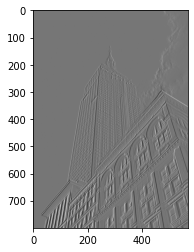

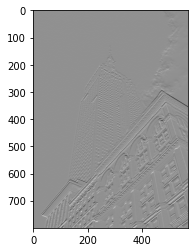

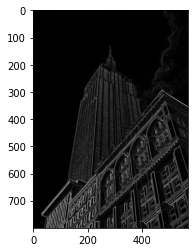

In [9]:
# Sobel derivative
imx = np.zeros(im_gray.shape)
filters.sobel(im_gray,1,imx)

plt.figure()
plt.imshow(imx)

imy = np.zeros(im_gray.shape)
filters.sobel(im_gray,0,imy)

plt.figure()
plt.imshow(imy)

magnitude = np.sqrt(imx**2+imy**2)

plt.figure()
plt.imshow(magnitude)

plt.show()

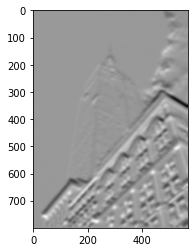

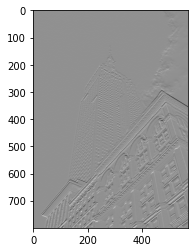

In [10]:
# Gaussian derivative

sigma = 5 # Chosen variance

imx = np.zeros(im_gray.shape)
filters.gaussian_filter(im_gray,(sigma,sigma),(1,0),imx)

plt.figure()
plt.imshow(imx)

imx = np.zeros(im_gray.shape)
filters.gaussian_filter(im_gray,(sigma,sigma),(0,1),imx)

plt.figure()
plt.imshow(imy)

plt.show()

In [11]:
# Scipy morphology and measurement modules for morphological operations and counting objects
from scipy.ndimage import measurements,morphology

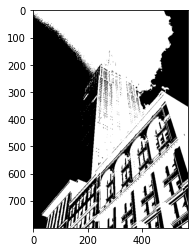

Number of objects: 1205


In [12]:
# Use a threshold to create a binary image from a grayscale image
im_b = 1*(im_gray<128)

plt.imshow(im_b)
plt.show()

labels,n_object = measurements.label(im_b)
print('Number of objects: %d' % n_object)

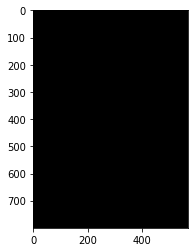

Number of objects: 1


In [13]:
# Morphology: Opening
im_open = morphology.binary_opening(im_gray,np.ones((2,3)),iterations=1)

plt.imshow(im_open)
plt.show()

labels_open, n_object_open = measurements.label(im_open)
print('Number of objects: %d' % n_object_open)

In [14]:
import rof

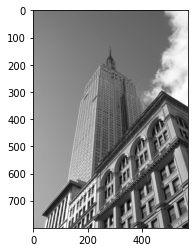

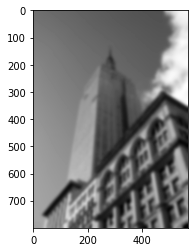

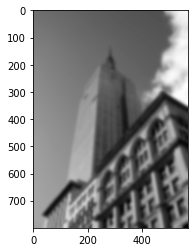

In [15]:
# Example use
im_blur = filters.gaussian_filter(im_gray,5)

plt.figure()
plt.imshow(im_gray)

plt.figure()
plt.imshow(im_blur)

im_rec, im_res = rof.denoise(im_blur,im_blur)

plt.figure()
plt.imshow(im_rec)

plt.show()